In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
from qutip import *
from scipy import linalg

In [2]:
#constants
hb=6.63*1e-34/(2*np.pi)#Planck constant
wl=2*np.pi*500*1e12 #frequency of driven laser
Nc =4                   # Number of cavity states
Nm1 =10                # Number of mech2 states
wm1=2*np.pi*10**6        #mech1 frequency
kappa =0.1             # Cavity damping rate   
gamma1 =1e-6             # Mech1 damping rate
n_th1 = 0    
delta=1
eta=1e-4
g0=1e-4 #optomechanical coupling rate --cavity with mech1
plist =np.linspace(0.0001,10,1500) #range of normalized detuning delta

In [3]:
a= tensor(destroy(Nc), qeye(Nm1))
b1 = tensor(qeye(Nc), destroy(Nm1))
num_a = a.dag()*a
num_b1 = b1.dag()*b1
    
#quadratures
x1 = (a + a.dag()) / np.sqrt(2)
y1 = -1j * (a - a.dag()) / np.sqrt(2)
q1 = (b1 + b1.dag()) / np.sqrt(2)
p1 = -1j * (b1 - b1.dag()) / np.sqrt(2)
R=[x1,y1,q1,p1]
cc = np.sqrt(kappa)*a #cavity collapse
cm1 = np.sqrt(gamma1*(1.0 + n_th1))*b1#mech1 
cp1 = np.sqrt(gamma1*n_th1)*b1.dag()#mech1
c_ops = [cc,cm1,cp1]
En=[]#Entanglement
var=[]#position variance for duffing oscillator

In [4]:
# definition of entanglement with one variable 'delta'
for P in plist:
    E=np.sqrt(2*0.1*wm1*0.001*P/(hb*wl))/wm1
    H =delta*(num_a) + num_b1 - g0*(b1.dag()+b1)*num_a  + E*(a.dag()+a)+eta*(b1+b1.dag())**4
    rho_ss= steadystate(H, c_ops)
#covariance matrix
    varxc=variance(x1,rho_ss)
    varpc=variance(y1,rho_ss)
    varq1=variance(q1,rho_ss)
    varp1=variance(p1,rho_ss)
    covxcpc=1/2* expect(x1*y1+y1*x1,rho_ss)-expect(x1,rho_ss)*expect(y1,rho_ss)
    covxcq1=1/2* expect(x1*q1+q1*x1,rho_ss)-expect(x1,rho_ss)*expect(q1,rho_ss)
    covxcp1=1/2* expect(x1*p1+x1*p1,rho_ss)-expect(x1,rho_ss)*expect(p1,rho_ss)
    covpcp1=1/2* expect(p1*y1+y1*p1,rho_ss)-expect(p1,rho_ss)*expect(y1,rho_ss)
    covpcq1=1/2* expect(q1*y1+y1*q1,rho_ss)-expect(q1,rho_ss)*expect(y1,rho_ss)
    covq1p1=1/2* expect(q1*p1+p1*q1,rho_ss)-expect(q1,rho_ss)*expect(p1,rho_ss)
    V=array([[varxc,covxcpc,covxcq1,covxcp1],[covxcpc,varpc,covpcq1,covpcp1],[covxcq1,covpcq1,varq1,covq1p1],[covxcp1,covpcp1,covq1p1,varp1]]).astype('float64')#  change the datatype
    var.append(varq1)
    def logarithmic_negativity(V):
        A = array([[varxc,covxcpc],[covxcpc,varpc]])
        B = array([[varq1,covq1p1],[covq1p1,varp1]])
        C = array([[covxcq1,covxcp1],[covpcq1,covpcp1]])
        sigma = linalg.det(A) +linalg.det(B) - 2*linalg.det(C)
        eta = sigma/2 -np.sqrt(sigma**2 - 4 * linalg.det(V))/ 2
        if eta < 0.0:
            return 0.0
        nu = np.sqrt(eta)
        lognu = -np.log(2 * nu)
        logneg = max(0, lognu)
        return logneg
    En.append(logarithmic_negativity(V))

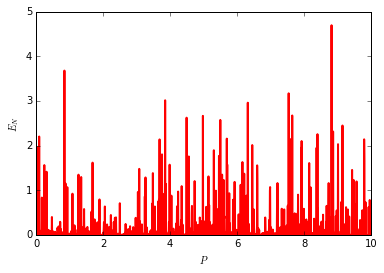

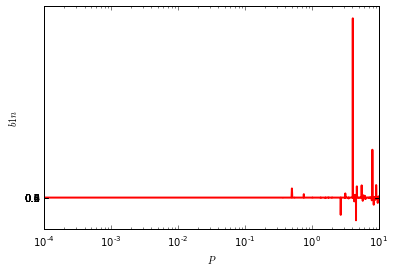

In [5]:
fig=figure(1)
ax = fig.add_subplot(111)
ax.plot(plist,En,'r',lw=2)
ylabel('$E_N$')
xlabel('$P$')
show()
fig=figure(2)
ax = fig.add_subplot(111)
ax.plot(plist,var,'r',lw=2)
yticks = [0,0.1, 0.2, 0.3,0.4,0.5,0.6]
ax.set_yticks(yticks)
plt.xscale('log')
ylabel('$b1n$')
xlabel('$P$')
show()